# Example Solutions for E2

This notebook contains example solutions to the excercises given in Notebook <a href="E2 - Exercises on Physical Chemistry.ipynb">E2 - Exercises on Physical Chemistry</a>.

Quick links:
* [Exercise 1: Modeling a Two-way Reaction to Understand Equilibrium](#equilibrium)
* [Exercise 2: Modeling Michelis-Menten Kinetics](#kinetics)

<a id="equilibrium"></a>
## Exercise 1: Modeling a Reversible Reaction to Understand Equilibrium

Not it's time for you to try. Using the same approach as for the one-way reaction above, you will model the two-way reversible reaction
$$\mathrm{Mb} + \mathrm{O_2} \underset{k_-}{\overset{k_+}{\rightleftharpoons}} \mathrm{MbO_2}.$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

**Exercise 1a)**

Using the law of mass action, find and write out the system of ODEs describing the reaction.
$$
\frac{\rm d [Mb]}{{\rm d}t} = \ldots, \qquad
\frac{\rm d [O_2]}{{\rm d}t} = \ldots, \qquad
\frac{\rm d [MbO_2]}{{\rm d}t} = \ldots.$$
(Use pen and paper.)

### Example solution:

Note that the three terms become the same, with the exception of a sign.

$$
\frac{\rm d [Mb]}{{\rm d}t} = k_-[{\rm MbO_2}] - k_+[{\rm Mb}][{\rm O_2}], \qquad
\frac{\rm d [O_2]}{{\rm d}t} = k_-[{\rm MbO_2}] - k_+[{\rm Mb}][{\rm O_2}]\ldots, \qquad
\frac{\rm d [MbO_2]}{{\rm d}t} = k_+[{\rm Mb}][{\rm O_2}] - k_-[{\rm MbO_2}].$$


**Exercise 1b)**

Fill in the code below to define the RHS of the ODE-system as a Python function.

In [2]:
def rhs(t, y, kp, km):
    Mb, O2, MbO2 = y
            
    # Compute derivatives
    dMb_dt = km*MbO2 - kp*Mb*O2
    dO2_dt = dMb_dt
    dMbO2_dt = -dMb_dt
    
    # Return RHS as sequence
    return (dMb_dt, dO2_dt, dMbO2_dt)

**Exercise 1c)**

Use `scipy.integrate.solve_ivp` to solve the system by filling in the code cell below. Make up some reasonable parameters and initial conditions.

In [3]:
# Define time span
time = (0, 5)

# Define initial condition vector
y0 = (2, 4, 0)

# Define parameter vector
kp = 2
km = 1
params = (kp, km)

# Call the ODE solver
solution = solve_ivp(rhs, time, y0, args=params, max_step=0.1)

#### Exercise 1d)

Plot the solutions you just computed by filling in code below. 

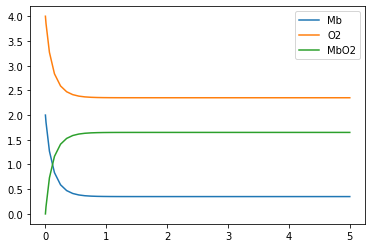

In [4]:
# Split up the solution matrix
t = solution.t
Mb, O2, MbO2 = solution.y

# Plot the solutions
plt.plot(t, Mb, label="Mb")
plt.plot(t, O2, label="O2")
plt.plot(t, MbO2, label="MbO2")
plt.legend()
plt.show()

**Exercise 1d)**

From the law of mass action, we found an equilibrium condition for the system
$$\frac{[\mathrm{Mb}][\mathrm{O_2}]}{[\mathrm{MbO_2}]} = \frac{k_-}{k_+} = K_{\rm d}.$$

Fill in the parameters you chose and verify that this equilibrium condition is met in your numerical solution.

In [5]:
LHS = Mb[-1]*O2[-1]/MbO2[-1]
Kd = km/kp


print(f"Kd = {Kd:.2f}")
print(f"At end of solution: [Mb][O2]/[MbO2] = {LHS:.2f}")
 
print(f"Is system at equilibrium? {np.isclose(LHS, Kd)}")

Kd = 0.50
At end of solution: [Mb][O2]/[MbO2] = 0.50
Is system at equilibrium? True


<a id='kinetics'></a>
## Exercise 2: Modeling Michaelis-Menten Kinetics

Let us model the Michaelis-Menten reaction and analyse the behavior
$${\rm S} + {\rm E} \underset{k_{-1}}{\overset{k_1}{\rightleftharpoons}} {\rm ES} \overset{k_2}{\rightarrow} {\rm E} + {\rm P}.$$

**Exercise 2a)**

Using the law of mass action, write out the system of ODEs that describe the four concentrations of the system

$$
\frac{\rm d[S]}{{\rm d}t} = \ldots, \qquad
\frac{\rm d[E]}{{\rm d}t} = \ldots, \qquad
\frac{\rm d[ES]}{{\rm d}t} = \ldots, \qquad
\frac{\rm d[P]}{{\rm d}t} = \ldots
$$


#### Example solution:

\begin{align}
\frac{\rm d[S]}{{\rm d}t} &= k_{-1}[{\rm ES}] - k_{1}[{\rm S}][{\rm E}], \\[0.5cm]
\frac{\rm d[E]}{{\rm d}t} &= k_{-1}[{\rm ES}] + k_2 [{\rm ES}] - k_{1}[{\rm S}][{\rm E}] = 
                             (k_{-1} + k_2)[{\rm ES}] - k_{1}[{\rm S}][{\rm E}], \\[0.5cm]
\frac{\rm d[ES]}{{\rm d}t} &= k_{1}[{\rm S}][{\rm E}] - (k_{-1} + k_2)[{\rm ES}], \\[0.5cm]
\frac{\rm d[P]}{{\rm d}t} &= k_2[{\rm ES}].
\end{align}



**Exercise 2b)**

Fill in the code below to define the RHS of the system

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
def rhs(t, y, k1p, k1m, k2):
    # Unpack the states
    S, E, ES, P = y
    
    # Compute derivatives
    dS_dt = k1m*ES - k1p*S*E
    dE_dt = (k1m + k2)*ES - k1p*S*E
    dES_dt = k1p*S*E - (k1m + k2)*ES
    dP_dt = k2*ES
    
    # Return RHS as sequence
    return [dS_dt, dE_dt, dES_dt, dP_dt]

**Exercise 2c)**

Solve the system with the rates $k_{-1} = 1$, $k_1 = 2$, $k_2 = 3$. Let $[{\rm S}]_0 = 1$ and $[{\rm E}]_0 = 0.1$. Solve the system for $t\in[0, 30]$.

In [8]:
# Define time vector
time = (0, 30)

# Define initial condition vector
y0 = (1, 0.1, 0, 0)

# Define parameter vector
k1p = 1
k1m = 2
k2 = 3
params = (k1p, k1m, k2)

# Call the ODE solver
solution = solve_ivp(rhs, time, y0, args=params, max_step=0.1)

**Exercise 2d)**

Now make two plots:
1. A plot of the substrate S and the product P
2. A plot of bound and free enzyme, SE and E

In [9]:
# Extract solution arrays
t = solution.t
S, E, ES, P = solution.y

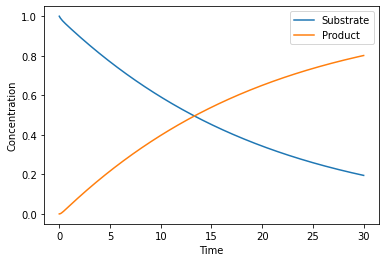

In [10]:
# Plot 1
plt.plot(t, S, label='Substrate')
plt.plot(t, P, label='Product')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

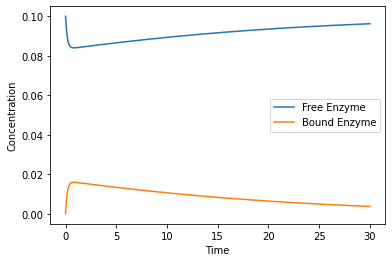

In [11]:
# Plot 2
plt.plot(t, E, label="Free Enzyme")
plt.plot(t, ES, label="Bound Enzyme")
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

**Exercise 2e)**

As a verification, let us make sure our solution is mass conserving. The following two quantities should be constant throughout the simulation:
1. The total amount of enzyme $[\rm E] + [\rm ES]$
2. The sum of substrate and product: $[\rm S] + [\rm ES] + [\rm P]$

First discuss with your breakout room why this should be the case. Then plot these curves and ensure that they are indeed constant. If they are not, go back and try to find your error.

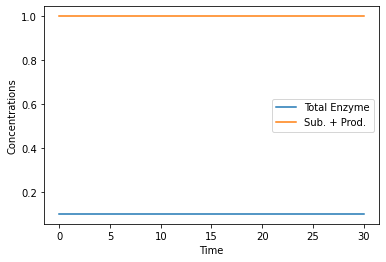

In [12]:
# Plot E + ES
plt.plot(t, E + ES, label="Total Enzyme")

# Plot S + ES + P
plt.plot(t, S + ES + P, label="Sub. + Prod.")

# Prettify the plot
plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.legend()

plt.show()

#### Exercise 2f)

The Michaelis-Menten gives the reaction velocity of the enzyme activity as
$$v = v_{\rm max} \frac{[S]}{K_m + [S]}, \qquad v_{\rm max} = k_2 [E]_{\rm tot}, \qquad K_m = \frac{k_{-1} + k_2}{k_1}.$$

In your code, you have not computed the reaction velocity itself, but recall that this is given by
$$[\dot{\rm P}] = k_2[{\rm ES}].$$

Plot the reaction velocity of your simulation and the reaction velocity predicted by the Michaelis-Menten equation in the same figure. Are the two different?

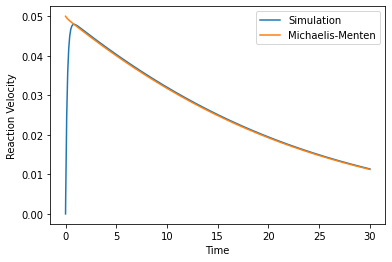

In [13]:
v_max = k2*(E[0] + ES[0])
Km = (k1m + k2)/k1p

v_sim = k2*ES
v_mm = v_max * S/(Km + S)

plt.plot(t, v_sim, label='Simulation')
plt.plot(t, v_mm, label='Michaelis-Menten')
plt.xlabel('Time')
plt.ylabel('Reaction Velocity')
plt.legend()
plt.show()

#### Exercise 2e)

* Explain the shape of the reaction velocity. 

* If you have programmed everything correctly, the two solutions should be slightly different. Explain why. 

(**Hint:** What assumptions did we make when deriving the Michaelis-Menten equation?)

#### Example Solution

* The reaction velocity starts high as there is a lot of substrate to convert, as time progresses the amount of total enzyme is constant, but the amount of substrate decreases resulting in lower overall reaction velocity. The fact that the reaction velocity drops right from the start indicates that the enzyme is not fully saturated, otherwise the reaction velocity should have stayed near constant.

* The two curves are very slightly different at the very start. This is because the simulation is based on the law of mass action alone, while the Michaelis-Menten assumed the system to be quasi-static, i.e., always at its equilibrium. We see that this assumption is poor right at the start of the simulation, because our initial conditions are far from equilibrium - however, we see the system very quick reaches its equilibrium and after this the simplified Michaelis-Menten equation is a very good approximation.
